In [1]:
import torch

device = torch.device("cpu")
device

device(type='cpu')

In [2]:
from PIL import Image, ImageDraw, ImageOps, ImageEnhance
import PIL
from transformers import YolosImageProcessor, YolosForObjectDetection, TrOCRProcessor, VisionEncoderDecoderModel
from datasets import load_dataset
from torchvision import transforms
import torch.nn.functional as F
import io

In [3]:


yolo_processor = YolosImageProcessor.from_pretrained('nickmuchi/yolos-small-finetuned-license-plate-detection')
yolo_model = YolosForObjectDetection.from_pretrained('nickmuchi/yolos-small-finetuned-license-plate-detection').to(device)

trocr_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed', use_fast=False)
trocr_model = VisionEncoderDecoderModel.from_pretrained('model\model.pt').to(device)


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

c:\Users\lozan\OneDrive - East Carolina University\ECU Materials\Sophomore\Spring\Natural Language Processing\HW\venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lozan\.cache\huggingface\hub\models--nickmuchi--yolos-small-finetuned-license-plate-detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(mess

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/123M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/123M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

c:\Users\lozan\OneDrive - East Carolina University\ECU Materials\Sophomore\Spring\Natural Language Processing\HW\venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lozan\.cache\huggingface\hub\models--microsoft--trocr-small-printed. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decod

In [5]:
from torchvision import transforms
import torch.nn.functional as F
import io

def crop_objects(boxes, image):
    #padding_to = 400
    images = []
    for box in boxes:
        normalized = len(box[box < 1]) == 4
        
        x_min, y_min, x_max, y_max = box

        if normalized:
            width, height = image.size
            x_min = int(x_min * width)
            y_min = int(y_min * height)
            x_max = int(x_max * width)
            y_max = int(y_max * height)

        # Ensure valid coordinates
        if x_min > x_max:
            x_min, x_max = x_max, x_min
        if y_min > y_max:
            y_min, y_max = y_max, y_min

        # Crop image
        try:
            img_cropped = image.crop([x_min, y_min, x_max, y_max])
            images.append(img_cropped)
        except:
            print(x_min, y_min, x_max, y_max, normalized)
            print(box)
            image.show()
            raise Exception

    return images

In [6]:
def show_images(images):
    for image in images:
        image.show()

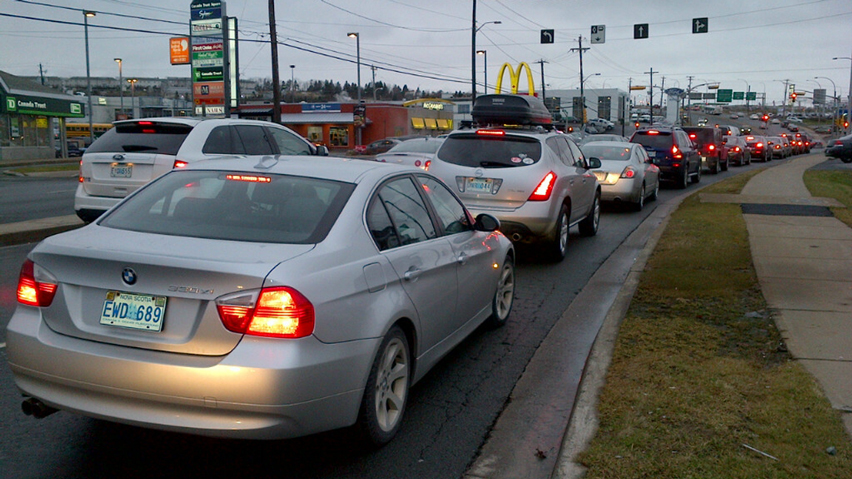

In [7]:
img = Image.open('image.png')
px = yolo_processor(img, return_tensors='pt').pixel_values.to(device)
output = yolo_processor.post_process_object_detection(yolo_model(px), threshold=.9)[0]["boxes"]
img

In [10]:
cropped_imgs = crop_objects(output, img)
show_images(cropped_imgs)

In [9]:
p_image = trocr_processor(cropped_imgs, return_tensors='pt').to(device).pixel_values
trocr_output = trocr_model.generate(p_image)
results = trocr_processor.post_process_image_text_to_text(trocr_output)
results

['EW02683', 'H0220Z', '913567']

In [58]:
t = torch.tensor([1,2]).to(device)
x,y,a,b = output[0]
print(x,y,a,b)

tensor(0.2522, device='cuda:0', grad_fn=<UnbindBackward0>) tensor(0.1830, device='cuda:0', grad_fn=<UnbindBackward0>) tensor(0.5053, device='cuda:0', grad_fn=<UnbindBackward0>) tensor(0.7104, device='cuda:0', grad_fn=<UnbindBackward0>)
